# Explore here

# all imports


In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import f_classif, SelectKBest



# Import dataset

In [358]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

In [359]:
df.shape

(41188, 21)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [361]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [362]:
df.describe(include="O").T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [363]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

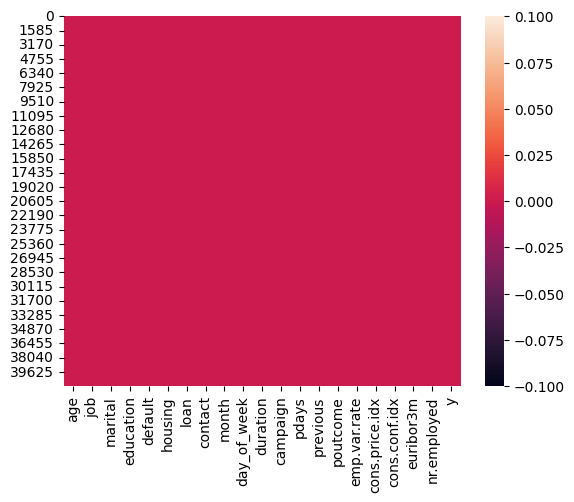

In [364]:
sns.heatmap(df.isnull())

<Axes: >

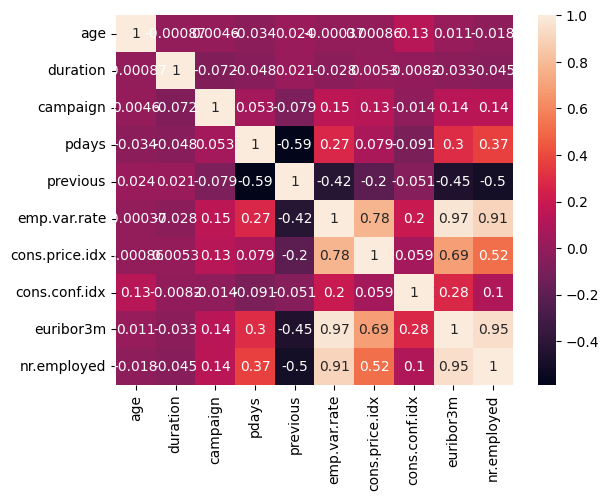

In [365]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Label Encoding

In [367]:
le = LabelEncoder()

df_encoded= df.apply(le.fit_transform)

In [368]:
df_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [369]:
df_num = df.select_dtypes(include=np.number)

In [370]:
df_cat = df.select_dtypes(include="O")

In [371]:
df_cat_enc = df_cat.apply(le.fit_transform)

In [372]:
df_cat_enc.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0


In [373]:
df_encoded = pd.concat([df_num, df_cat_enc], axis = 1)

In [374]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
 10  job             41188 non-null  int64  
 11  marital         41188 non-null  int64  
 12  education       41188 non-null  int64  
 13  default         41188 non-null  int64  
 14  housing         41188 non-null  int64  
 15  loan            41188 non-null  int64  
 16  contact         41188 non-null  int64  
 17  month           41188 non-null 

Visualisation

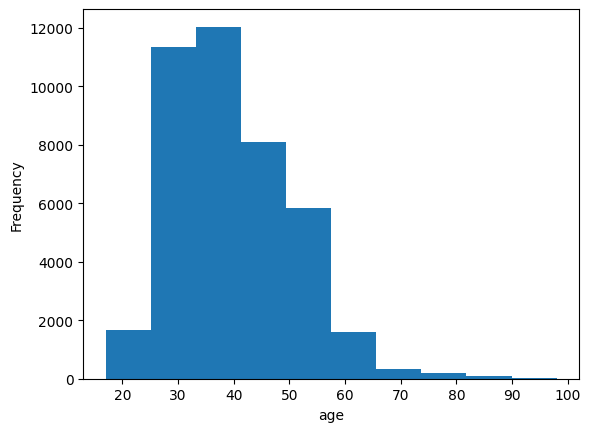

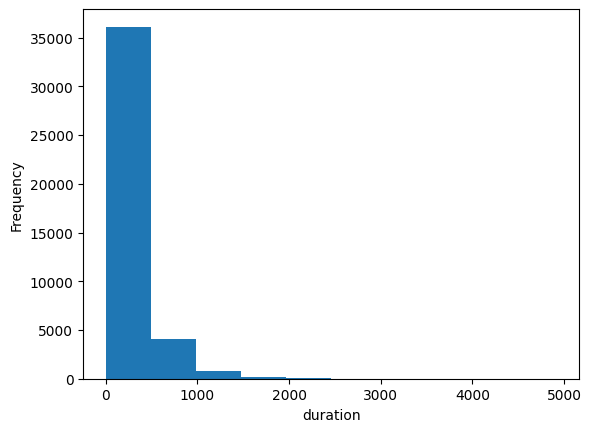

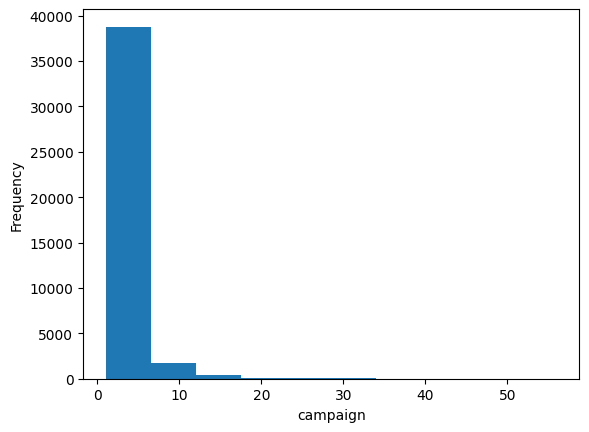

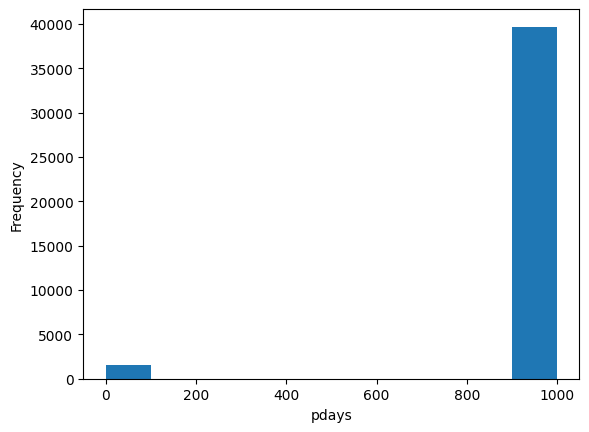

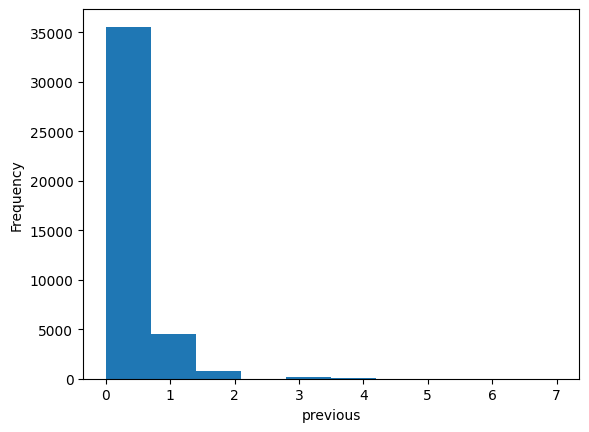

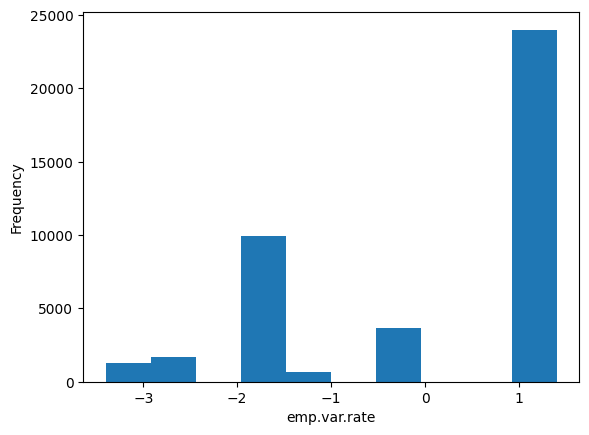

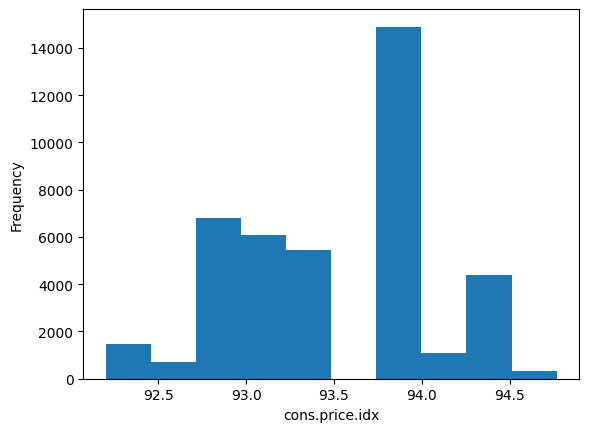

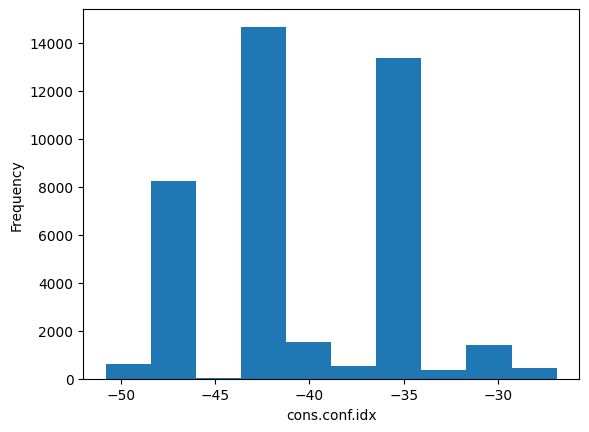

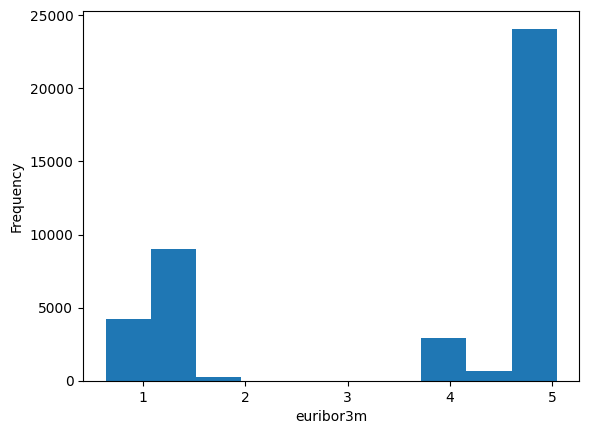

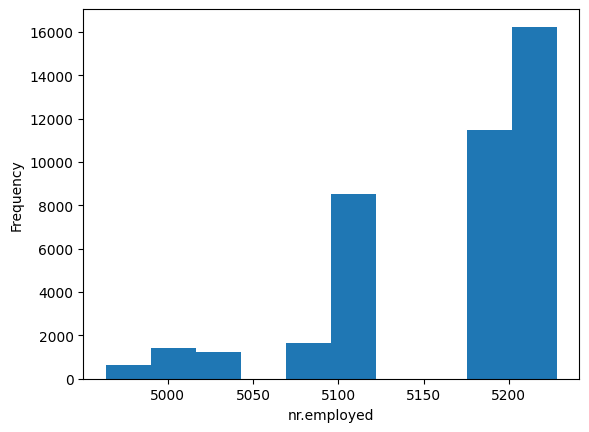

In [375]:
for c in df_num.columns:
    df_num[c].plot.hist()
    plt.xlabel(c)
    plt.show()

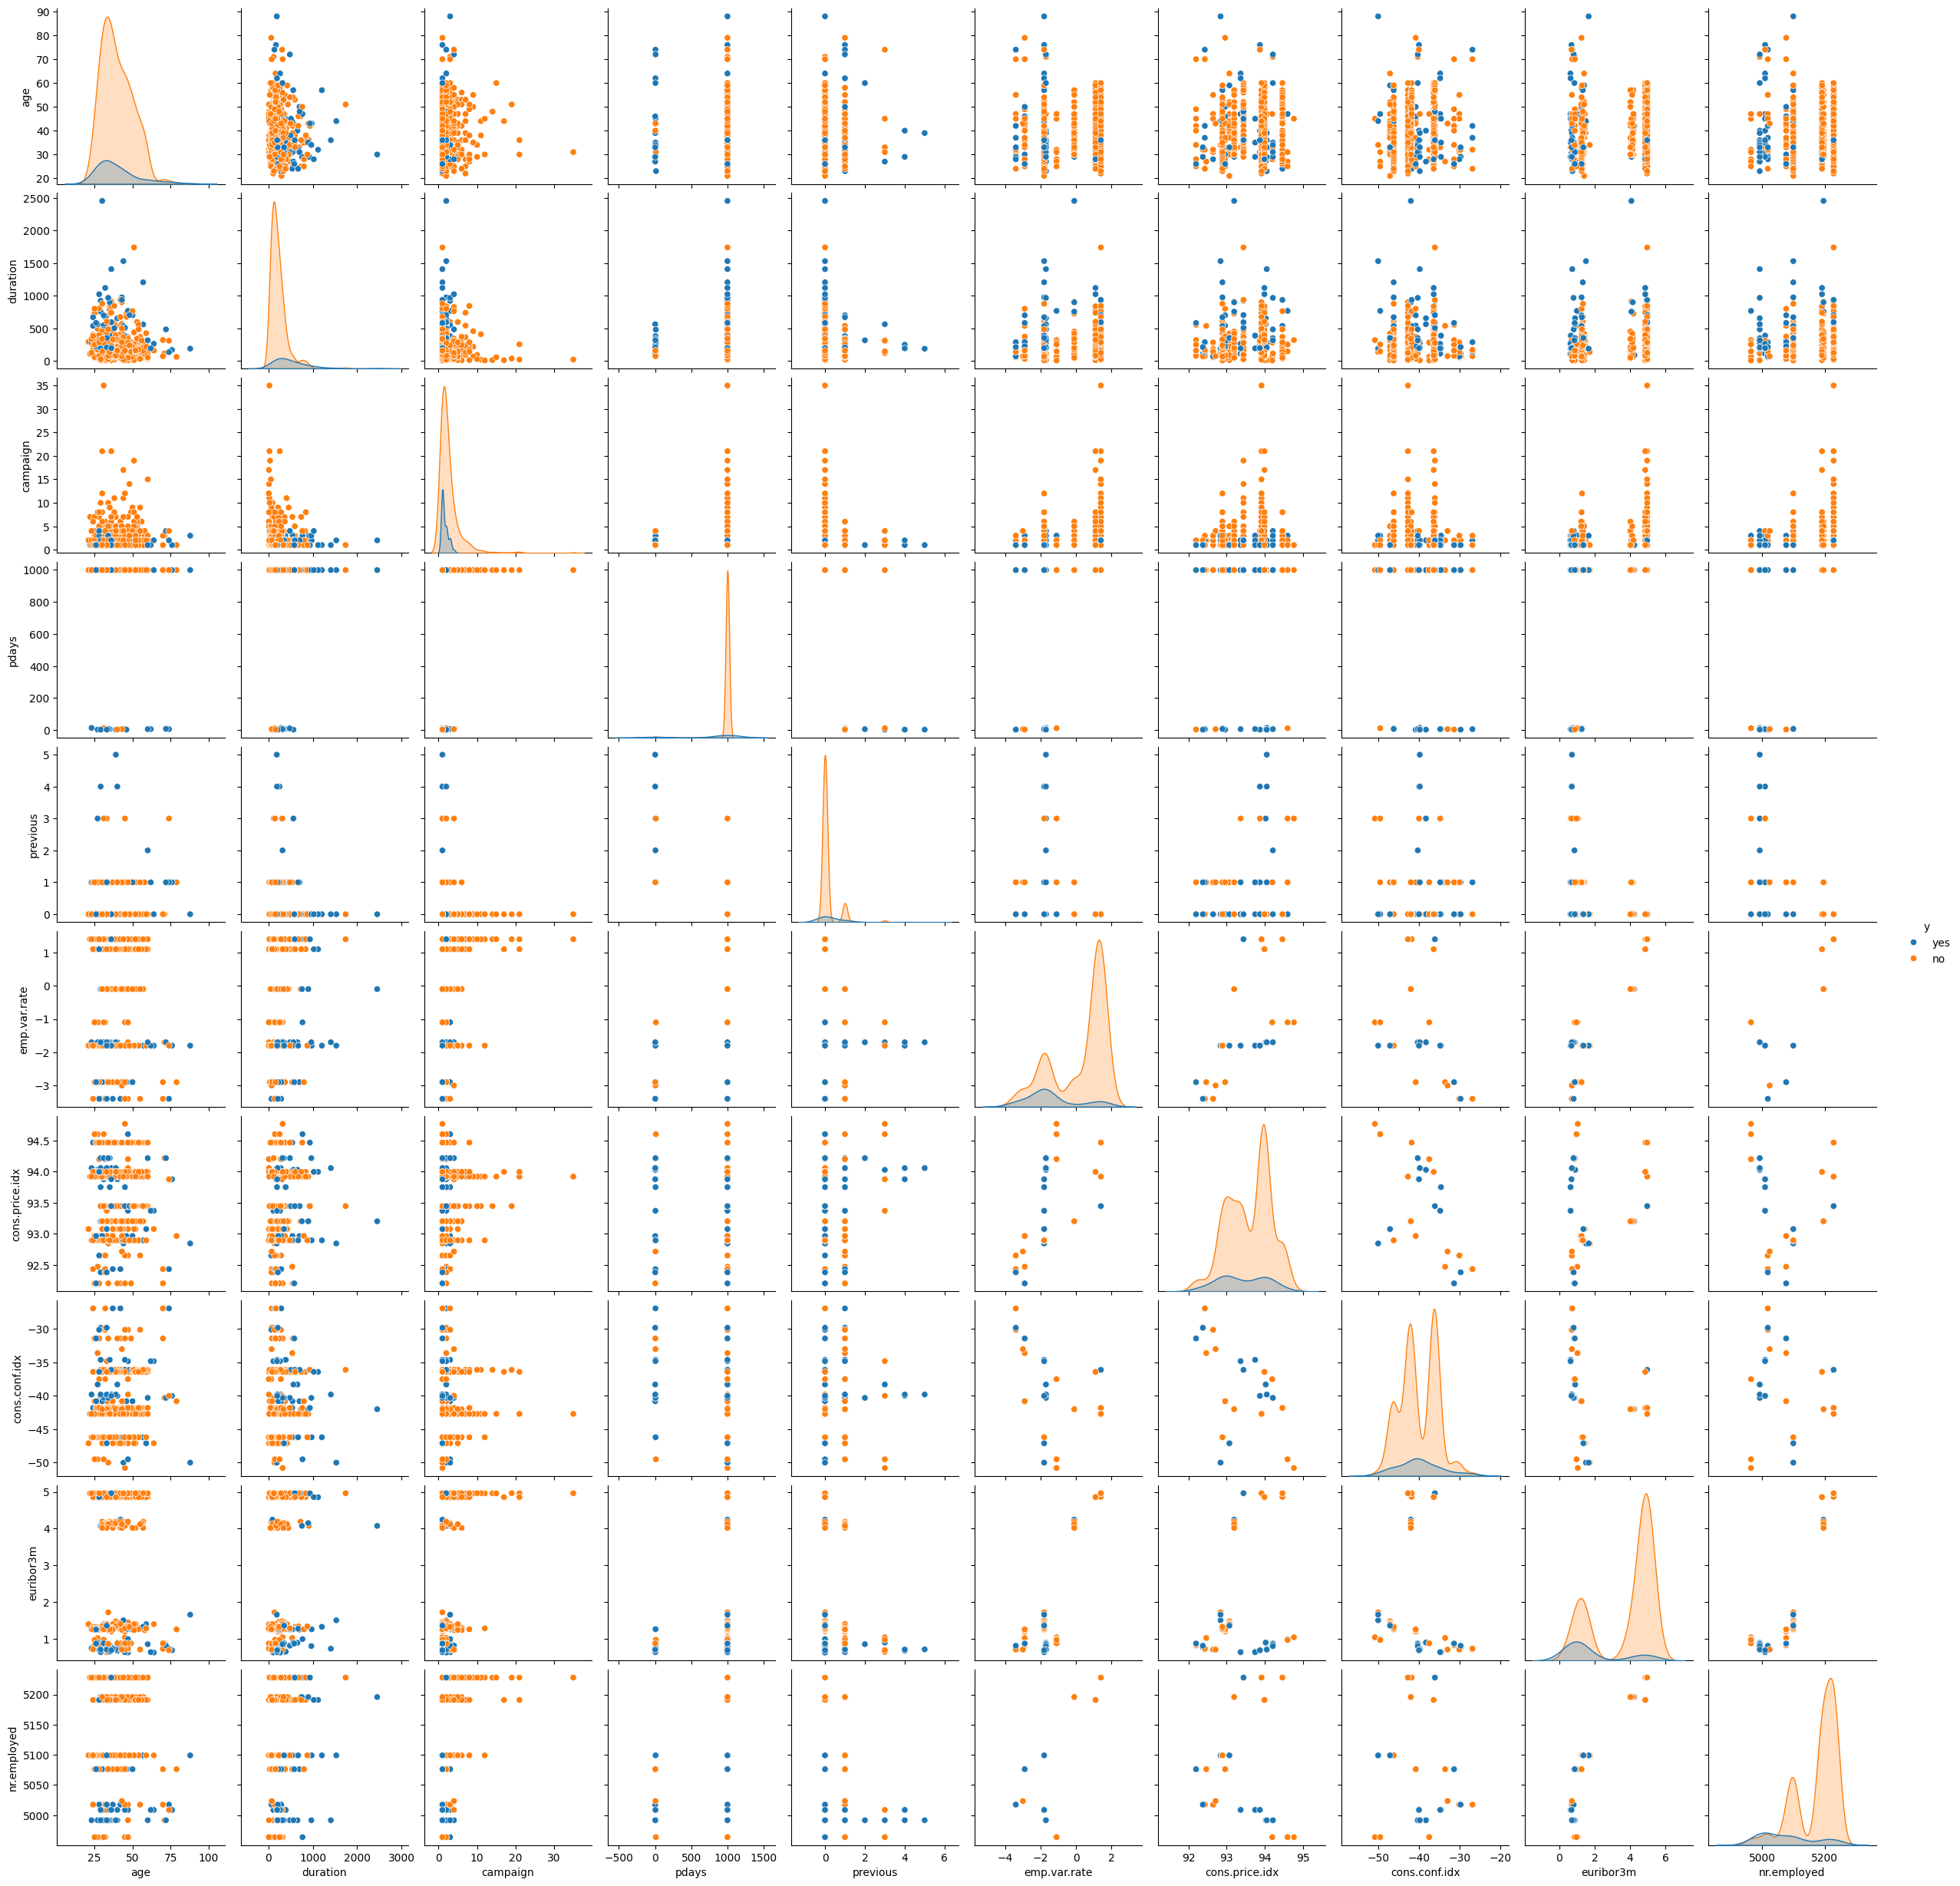

In [376]:
sns.pairplot(df.sample(500), hue="y")

<Axes: ylabel='count'>

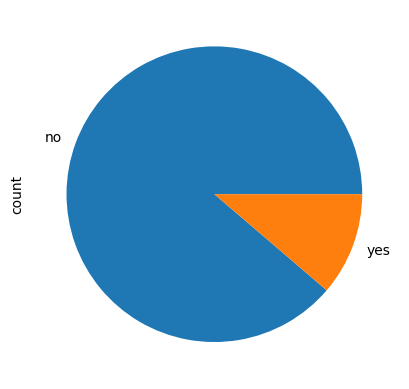

In [377]:
df.y.value_counts().plot.pie()

Machine Learning Part

In [378]:
# We divide the dataset into training and test samples
X = df_encoded.drop("y", axis = 1)
y = df_encoded["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
25611,49,227,4,999,0,-0.1,93.200,-42.0,4.120,5195.8,1,1,2,1,0,0,0,7,4,1
26010,37,202,2,999,1,-0.1,93.200,-42.0,4.120,5195.8,2,1,6,0,0,0,1,7,4,0
40194,78,1148,1,999,0,-1.7,94.215,-40.3,0.870,4991.6,5,1,0,0,0,0,0,3,1,1
297,36,120,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,6,0,2,0,1,6,1,1
36344,59,368,2,999,0,-2.9,92.963,-40.8,1.262,5076.2,5,0,6,0,0,0,0,4,3,1


<Axes: xlabel='y'>

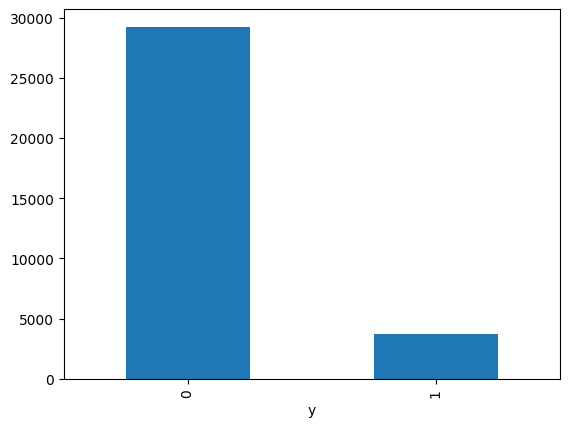

In [379]:
y_train.value_counts().plot.bar()

<Axes: xlabel='y'>

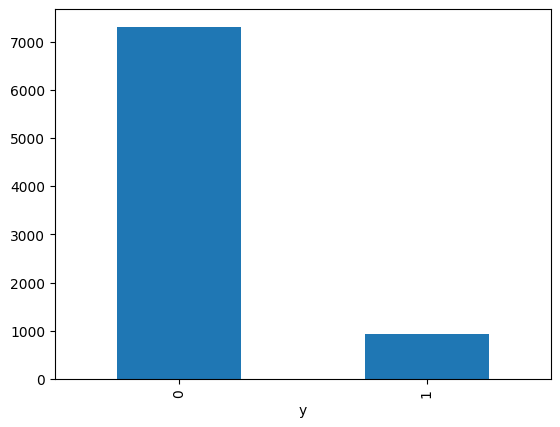

In [380]:
y_test.value_counts().plot.bar()

In [381]:
X_train.to_csv("X_Train.csv")

In [382]:
y_train.to_csv("y_train.csv")

In [383]:
X_test.to_csv("X_test.csv")

In [384]:
y_test.to_csv("y_test.csv")

In [385]:
# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 9)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train.head()

,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,contact
0,227.0,999.0,0.0,-0.1,93.200,4.120,5195.8,0.0
1,202.0,999.0,1.0,-0.1,93.200,4.120,5195.8,1.0
2,1148.0,999.0,0.0,-1.7,94.215,0.870,4991.6,0.0
3,120.0,999.0,0.0,1.1,93.994,4.857,5191.0,1.0
4,368.0,999.0,0.0,-2.9,92.963,1.262,5076.2,0.0


In [386]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns=X_test.columns)

X_train_scal.head()

,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,contact
0,-0.120196,0.196584,-0.350127,-0.114858,-0.648967,0.288964,0.398990,-0.758915
1,-0.216732,0.196584,1.653813,-0.114858,-0.648967,0.288964,0.398990,1.317671
2,3.436173,0.196584,-0.350127,-1.133161,1.103451,-1.583296,-2.420139,-0.758915
3,-0.533368,0.196584,-0.350127,0.648868,0.721890,0.713535,0.332723,1.317671
4,0.424264,0.196584,-0.350127,-1.896888,-1.058152,-1.357472,-1.252175,-0.758915


In [387]:
print(y.unique())

[0 1]


Model Training

In [388]:
start_time = timeit.default_timer()
model = LogisticRegression()
model.fit(X_train, y_train)
print("training elapsed time ", timeit.default_timer()-start_time)

training elapsed time  0.26687829899947246


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Assess Model

In [389]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [390]:
print(accuracy_score(y_test, y_pred))

0.9101723719349356


In [391]:
print(f1_score(y_test, y_pred))

0.4889502762430939


In [392]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.68      0.38      0.49       928

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



In [393]:
confusion_matrix(y_test, y_pred)

array([[7144,  166],
       [ 574,  354]])

<Axes: >

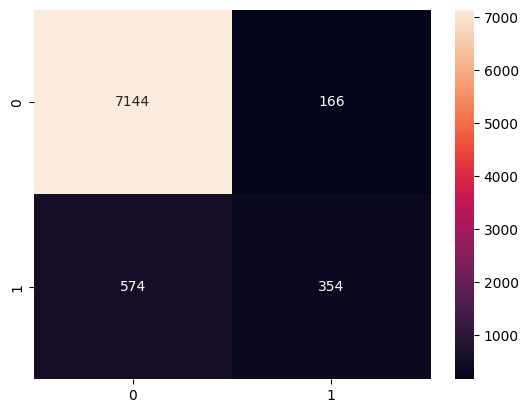

In [394]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

Feature Selection   